In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D



from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import os

In [2]:
url = "https://drive.google.com/file/d/1fw3DZ8DY8FBhI15vnuIijfUFSPf9hYmH/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [6]:
data.head()

,Datetime,PJME_MW,Date
0,2002-12-31 01:00:00,26498.0,2002-12-31 01:00:00
1,2002-12-31 02:00:00,25147.0,2002-12-31 02:00:00
2,2002-12-31 03:00:00,24574.0,2002-12-31 03:00:00
3,2002-12-31 04:00:00,24393.0,2002-12-31 04:00:00
4,2002-12-31 05:00:00,24860.0,2002-12-31 05:00:00


In [9]:
data=data.drop('Datetime',axis=1);

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   PJME_MW  145366 non-null  float64       
 1   Date     145366 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [12]:
data.set_index(['Date'],inplace=True)
data = data['PJME_MW'].resample('D').sum()
df=pd.DataFrame(data)

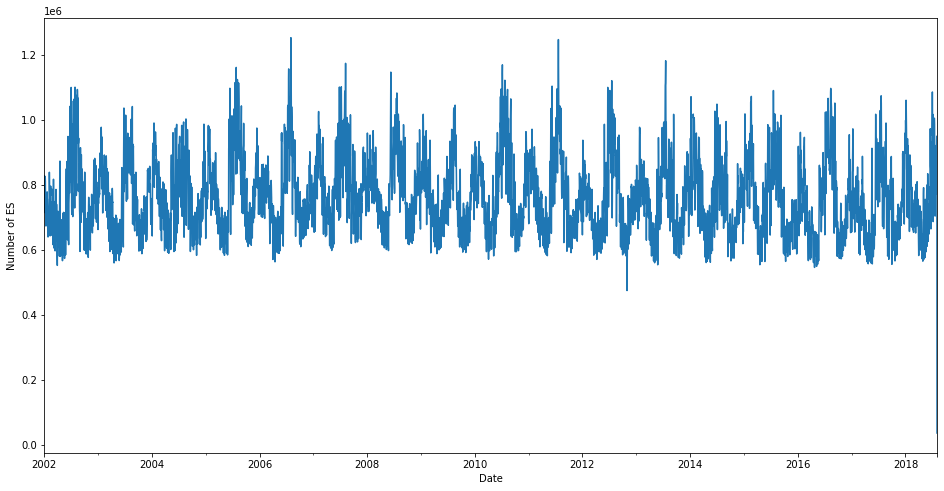

In [14]:
plt.figure(figsize=(16,8))
df['PJME_MW'].plot()
plt.xlabel('Date')
plt.ylabel('Number of ES')
plt.show()

In [15]:
df_1=df.values
df_1=df_1.astype('float32')

scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6059 entries, 2002-01-01 to 2018-08-03
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PJME_MW  6059 non-null   float64
dtypes: float64(1)
memory usage: 94.7 KB


In [22]:
ts

array([[ 0.11552429],
       [ 0.29190743],
       [ 0.3017726 ],
       ...,
       [ 0.48773515],
       [ 0.5020107 ],
       [-1.        ]], dtype=float32)

In [23]:
timestep = 30

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)
print(X)
print(Y)

k = 256
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]

[[[0.11552429]
  [0.29190743]
  [0.3017726 ]
  ...
  [0.10378563]
  [0.08567286]
  [0.06780624]]

 [[0.29190743]
  [0.3017726 ]
  [0.27038753]
  ...
  [0.08567286]
  [0.06780624]
  [0.13877988]]

 [[0.3017726 ]
  [0.27038753]
  [0.13993418]
  ...
  [0.06780624]
  [0.13877988]
  [0.11068368]]

 ...

 [[0.72368336]
  [0.72525644]
  [0.5043653 ]
  ...
  [0.20920503]
  [0.24051464]
  [0.30284476]]

 [[0.72525644]
  [0.5043653 ]
  [0.6127206 ]
  ...
  [0.24051464]
  [0.30284476]
  [0.48773515]]

 [[0.5043653 ]
  [0.6127206 ]
  [0.48436415]
  ...
  [0.30284476]
  [0.48773515]
  [0.5020107 ]]]
[[ 0.13877988]
 [ 0.11068368]
 [ 0.07065344]
 ...
 [ 0.48773515]
 [ 0.5020107 ]
 [-1.        ]]


In [19]:
Xtrain

array([[[ 0.11552429],
        [ 0.29190743],
        [ 0.3017726 ],
        ...,
        [ 0.10378563],
        [ 0.08567286],
        [ 0.06780624]],

       [[ 0.29190743],
        [ 0.3017726 ],
        [ 0.27038753],
        ...,
        [ 0.08567286],
        [ 0.06780624],
        [ 0.13877988]],

       [[ 0.3017726 ],
        [ 0.27038753],
        [ 0.13993418],
        ...,
        [ 0.06780624],
        [ 0.13877988],
        [ 0.11068368]],

       ...,

       [[ 0.29591072],
        [ 0.13591135],
        [ 0.15209317],
        ...,
        [ 0.04551446],
        [ 0.0560447 ],
        [ 0.0790391 ]],

       [[ 0.13591135],
        [ 0.15209317],
        [ 0.11766708],
        ...,
        [ 0.0560447 ],
        [ 0.0790391 ],
        [ 0.07958758]],

       [[ 0.15209317],
        [ 0.11766708],
        [ 0.15460384],
        ...,
        [ 0.0790391 ],
        [ 0.07958758],
        [-0.04146361]]], dtype=float32)

In [21]:
Ytrain

array([[ 1.38779879e-01],
       [ 1.10683680e-01],
       [ 7.06534386e-02],
       [ 6.87487125e-02],
       [ 2.24997759e-01],
       [ 3.19203973e-01],
       [ 2.41012216e-01],
       [ 2.11654902e-01],
       [ 1.56664491e-01],
       [ 3.42537165e-02],
       [-2.62713432e-03],
       [ 1.58115983e-01],
       [ 2.38591909e-01],
       [ 2.01412201e-01],
       [ 2.49113798e-01],
       [ 1.89571738e-01],
       [-8.36849213e-05],
       [ 1.14452839e-03],
       [ 1.60583973e-01],
       [ 1.69517994e-01],
       [ 1.11128688e-01],
       [ 6.69901371e-02],
       [ 8.67137909e-02],
       [ 2.96692848e-02],
       [ 7.08365440e-03],
       [ 1.20818138e-01],
       [ 9.71487761e-02],
       [ 1.79568648e-01],
       [ 2.32700348e-01],
       [ 1.84537411e-01],
       [ 6.45550489e-02],
       [-4.76785898e-02],
       [ 2.12722182e-01],
       [ 2.83818960e-01],
       [ 1.69884205e-01],
       [ 9.52736139e-02],
       [ 5.94091415e-02],
       [-6.43727779e-02],
       [-4.3

In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10000, verbose=0)

In [ ]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]

In [ ]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)

Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)

Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

0.021766724

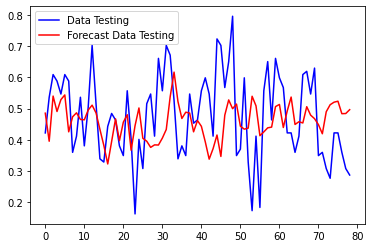

In [ ]:
plt.plot(Ytest, label='Data Testing', color='blue')
plt.plot(preds, label='Forecast Data Testing', color='red')
plt.legend(loc='upper left')